<a href="https://colab.research.google.com/github/20014894UHI/20014894_Data_analytics_assignment1/blob/main/Assignment2_DNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - DNN Regressor

[Shared with 1122131uhi]

In this sheet we will use the data to build a DNN regressor models.
These models aim to measure the interactions between the elements and how they affect collisions. Neural networks account for interactions and capture complex interactions. A DNN model includes hidden layers that aggregate interactions that are not observed directly.


In [1]:
# needed to create the data frame
import pandas as pd
# for reading data, for speedy maths based calculations
import numpy as np

We will use the Keras interface to the TensorFlow library.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__) # 2.12.0

2.12.0


# For reference and comparison create a dataframe with scaledCollision and corresponding collision value

This is calculated based on the the values for 2022. 2021 and 2023 are also included.


In [3]:
# The feature scaling formula we used in the R sheet was:
# x-min(x) / max(x) - min(x).
# scaledCollisions=(num_collisions - min(num_collisions)) /(max(num_collisions-min(num_collisions))
# So for 2022 it was:
# scaledCollisions = (num_collisions - 180) / 185
# scaledCollisions * 185 = num_collisions - 180
# Take the example of .4 for scaledCollisions
# .4 * 185 = num_collisions - 180
# 74 = num_collisions - 180
# num_collisions = 254

# So for 2021 it was:
# scaledCollisions = (num_collisions - 184) / (388-184)
# scaledCollisions = (num_collisions - 184) / 204
# scaledCollisions * 204 = num_collisions - 184
# Take the example of .4 for scaledCollisions
# .4 * 204 = num_collisions - 184
# 81.6 = num_collisions - 184
# num_collisions = 265.5


# So for 2023 it was:
# scaledCollisions = (num_collisions - 128) / (314-128)
# scaledCollisions = (num_collisions - 128) / 186
# scaledCollisions * 186 = num_collisions - 128
# Take the example of .4 for scaledCollisions
# .4 * 186 = num_collisions - 128
# 74.4 = num_collisions - 128
# num_collisions = 202.4



In [4]:
# For testing, create a dataframe as a reference with the scaledCollision value for 2022 and
# corresponding collision value that the scaledCollision equates to for 2022
a22 = 185
b22 = 180
a21= 204
b21 = 184
a23 = 186
b23 = 128
referencedf = pd.DataFrame.from_dict(data =
				{
            'scaledCollision2022' : [.1,.2,.3,.4,.5,.6,.7,.8,.9],
            'Collisions' : [(.1 * a22 +b22),(.2 *a22 +b22) ,(.3 *a22 +b22), (.4 *a22 +b22),(.5 *a22 +b22),  (.6 *a22 +b22),(.7 *a22 +b22),(.8 *a22 +b22),(.9 *a22 + b22) ]
        })
referencedf

,scaledCollision2022,Collisions
0,0.1,198.5
1,0.2,217.0
2,0.3,235.5
3,0.4,254.0
4,0.5,272.5
5,0.6,291.0
6,0.7,309.5
7,0.8,328.0
8,0.9,346.5


# Reference of min, max and mean num_collisions for 2021 - 2023 as a reference

Referring back to the earlier datasets (previous R sheets), the minimum and maximum collisions in our datasets with outliers removed were as follows. These figures are a guide as to whether results are in line or outlandish.


In [5]:
# Min and max collisions for 2021 - 2023 based on datasets with outliers removed.
referencedf1 = pd.DataFrame.from_dict(data =
				{
            'Year' : [2021,2022,2023],
            'Min num_collisions' : [184,180,128],
            'Max num_collisions' : [388,365,314],
            'Median' : [310,284,244],
            'Mean' : [303,282,243]
 })
referencedf1

,Year,Min num_collisions,Max num_collisions,Median,Mean
0,2021,184,388,310,303
1,2022,180,365,284,282
2,2023,128,314,244,243


# Import dataset for further splitting for different models

In [6]:
# create data frame from csv file we hosted on our github
# The composite DNN dataset from which we can extract further datasets
# dfwc = pd.read_csv('https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/weatherCollisionsDNNdata.csv', index_col=0)
# DNN data set to include months, daysofweek, year, temperature, wind speed, scaledCollisions. Added num_collisions as a comparison reference also)
dfwc_DNN_mm_day_yr_temp_wind1 = pd.read_csv('https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/wc_DNN_mm_day_yr_temp_wind.csv', index_col=0)
# Below does not include num_collisions:
#dfwc_DNN_mm_day_yr_temp_wind = pd.read_csv('https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/wc_DNN_mm_day_yr_temp_windv2.csv', index_col=0)

## Shuffle the data

In [7]:
# iloc allows us to select by rows. Shuffle the data by rows determined at random.
dfwc_DNN_mm_day_yr_temp_wind = dfwc_DNN_mm_day_yr_temp_wind1.iloc[np.random.permutation(len(dfwc_DNN_mm_day_yr_temp_wind1))]

# Select all rows of the columns outlined i.e. The 3rd (2 as indexes start from 0)
# predictors = dfwc_DNN_mm_day_yr_temp_wind.iloc[:,2:3]
# If it was the last column, could use predictorTest = shuffle.iloc[:,-1]
# print out the first 6 rows of predictors.
# print(predictors[:6])

In [8]:
# print out the first 6 rows of shuffled data
print(dfwc_DNN_mm_day_yr_temp_wind[:6])

     Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  ...  Sat  Sun  Thur  \
509    0    0    0    0    0    0    1    0    0    0  ...    0    0     0   
291    0    0    0    0    0    0    0    0    0    0  ...    1    0     0   
319    0    0    0    0    0    0    0    0    0    1  ...    1    0     0   
260    0    0    0    0    0    0    0    0    0    0  ...    0    0     0   
303    0    0    0    0    0    0    0    0    0    1  ...    0    0     1   
317    0    0    0    0    0    0    0    0    0    1  ...    0    0     1   

     Tue  Wed  year  temperature  wind_speed  scaledCollisions  num_collisions  
509    1    0  2022         20.8         5.0          0.686486             307  
291    0    0  2021         14.1         6.3          0.823529             352  
319    0    0  2021          2.6         8.4          0.392157             264  
260    1    0  2021         20.4         8.8          0.549020             296  
303    0    0  2021         11.3         3.2    

# Model 2 DNN dataset - days of week, temperature, (scaledCollisions)


This was a diagnostic and simple dataset to scale back and troubleshoot a 'nan' result. It is also useful to compare to the models with more features.

In [9]:
# remove some columns for this modeel
dfwc_DNN_dow_temp = dfwc_DNN_mm_day_yr_temp_wind.drop(
    columns=[
        'num_collisions',
        'Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        'wind_speed', 'year' #'No.Snow','Snow','No.fog','Fog','Calm','Gentle_breeze','Light_air','Light_breeze','Moderate_breeze','Cold','Freezing.or.below','Hot','Mild','Very.warm','Warm','One','Ten','Three','Four','Five','Six','Seven','Eight','Nine','Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'
        ])

As the data is shuffled there is a variety of temerature values in the range.  

In [10]:
# check data - DNN data set to include daysofweek, temperature, scaledCollisions.
# removed year, months
dfwc_DNN_dow_temp[:5]

,Fri,Mon,Sat,Sun,Thur,Tue,Wed,temperature,scaledCollisions
509,0,0,0,0,0,1,0,20.8,0.686486
291,0,0,1,0,0,0,0,14.1,0.823529
319,0,0,1,0,0,0,0,2.6,0.392157
260,0,0,0,0,0,1,0,20.4,0.549020
303,0,0,0,0,1,0,0,11.3,0.529412


In [11]:
# iterating the columns
for col in dfwc_DNN_dow_temp.columns:
    print(col)
# This one has month, day of week, year, temperature, wind speed, num_trips

Fri
Mon
Sat
Sun
Thur
Tue
Wed
temperature
scaledCollisions


In [12]:
dnn_dow_temp_input_data = [dfwc_DNN_dow_temp["temperature"],
                  dfwc_DNN_dow_temp["Sat"], dfwc_DNN_dow_temp["Sun"], dfwc_DNN_dow_temp["Mon"], dfwc_DNN_dow_temp["Tue"], dfwc_DNN_mm_day_yr_temp_wind["Wed"], dfwc_DNN_dow_temp["Thur"], dfwc_DNN_dow_temp["Fri"],
                  dfwc_DNN_dow_temp["scaledCollisions"]]
headers2 = ["temperature", "Sat","Sun","Mon","Tue","Wed","Thur","Fri",
           "scaledCollisions"]
dnn_dow_temp_input = pd.concat(dnn_dow_temp_input_data, axis=1, keys=headers2)


In [13]:
dnn_dow_temp_input.head()

,temperature,Sat,Sun,Mon,Tue,Wed,Thur,Fri,scaledCollisions
509,20.8,0,0,0,1,0,0,0,0.686486
291,14.1,1,0,0,0,0,0,0,0.823529
319,2.6,1,0,0,0,0,0,0,0.392157
260,20.4,0,0,0,1,0,0,0,0.549020
303,11.3,0,0,0,0,0,1,0,0.529412


### Training and test datasets

In [14]:
training_dataset2 = dnn_dow_temp_input.sample(frac=0.8, random_state=0)
test_dataset2 = dnn_dow_temp_input.drop(training_dataset2.index)

In [15]:
training_features2 = training_dataset2.copy()
test_features2 = test_dataset2.copy()

training_labels2 = training_features2.pop('scaledCollisions')
test_labels2 = test_features2.pop('scaledCollisions')

In [16]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [17]:
training_labels2 = training_labels2/SCALE_NUM_COLLISIONS
test_labels2 = test_labels2/SCALE_NUM_COLLISIONS

In [18]:
for col in dnn_dow_temp_input.columns:
    print(col)
# 22 excluding scaled collisions

temperature
Sat
Sun
Mon
Tue
Wed
Thur
Fri
scaledCollisions


## Model specification

In [19]:
normaliser2 = tf.keras.layers.Normalization(axis=-1)
normaliser2.adapt(np.array(training_features2))

In [20]:
# Normalisation layer (22 inputs), 2 layers of 48, with 1 output.
# The 48 can be adjusted to improve the net.
# Activation function captures non linearities
dnn_model_2 = keras.Sequential([
      normaliser2,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])


## Compile the model

In [21]:
# Specify the optimizer and the loss function
dnn_model_2.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [22]:
# Print out the statistics - the model's architecture, shape and number of parameters associated with each layer.
dnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 48)                432       
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 2,850
Trainable params: 2,833
Non-trainable params: 17
_________________________________________________________________


Non-trainable parameters shows the number of weights that are not updated during training with backpropagation.

## Train the model

In [23]:
#Fit the model. This applies backpropagation and gradient descent with the training data to update the weights.
# The fit step specifies what percentage of the data is to be used for validation (validation_split).
%%time
history2 = dnn_model_2.fit(
    training_features2,
    training_labels2,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 9.95 s, sys: 356 ms, total: 10.3 s
Wall time: 23.9 s


In [24]:
#history2.history

As the data was shuffled, there is a good variety of temeratures and days of the week.

In [25]:
# View the validation data
test_features2[:10]

,temperature,Sat,Sun,Mon,Tue,Wed,Thur,Fri
191,25.9,0,0,0,1,0,0,0
137,26.7,0,1,0,0,0,0,0
79,10.3,0,0,1,0,0,0,0
227,28.8,0,0,0,0,0,1,0
711,15.1,0,0,0,0,1,0,0
50,-1.3,0,1,0,0,0,0,0
601,21.1,0,0,0,0,0,1,0
510,22.7,0,0,0,0,1,0,0
750,5.8,0,1,0,0,0,0,0
673,9.1,1,0,0,0,0,0,0


## Evaluate model 2 on the test data (0.12997516989707947)


In [26]:
# we want to minimise this. The model with the lowest is the best.
dnn_model_2_results = dnn_model_2.evaluate(test_features2, test_labels2, verbose=1)
print(dnn_model_2_results)

6/6 [==============================] - 0s 2ms/step - loss: 0.1517
0.15173247456550598


## Validation - Make predictions based on the validation data

In [27]:
# Make the predictions by the model on tHE TEST data
print("Generate predictions for 10 samples")
linear_day_predictions2TD = dnn_model_2.predict(test_features2[:10])*SCALE_NUM_COLLISIONS
linear_day_predictions2TD
#print("predictions shape:", linear_day_predictions2TD.shape)

Generate predictions for 10 samples
1/1 [==============================] - 0s 109ms/step


array([[0.65886   ],
       [0.5589233 ],
       [0.5549419 ],
       [0.6305053 ],
       [0.66793513],
       [0.26453573],
       [0.6751214 ],
       [0.7055102 ],
       [0.3518297 ],
       [0.59717685]], dtype=float32)

The above shows the scaled collision values for the validation data.

In [28]:
# Make the predictions by the model on the TEST DATA data and convert based on scaledCollisions for 2022
linear_day_predictions2TDConverted = np.round(dnn_model_2.predict(test_features2[:10])*a22 +b22)
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions2TDConverted

1/1 [==============================] - 0s 32ms/step


array([[302.],
       [283.],
       [283.],
       [297.],
       [304.],
       [229.],
       [305.],
       [311.],
       [245.],
       [290.]], dtype=float32)

 The above results are the converted collision results for the sample rows of validation data based on the scaled collision calculation for 2022 for example.

## Compare the prediction to the recorded values for collisions in the validation dataset

### Model 2 - Validation result 1

In this run, the first test value had a temperature of 19.3 and occured on a Thursday.
The predicted scaled collision value of 0.7295978 corresponds to a **333** collisions (based on 2021 min and max collisions). The actual recorded number of collisions for the single matching record was **324** and occurred on a Thursday, 1st April in 2021.
> Difference: Predicted was 9 more than recorded collisions.

In [29]:
# The first 1 test values were
test_features2[:1]  # will yield a different result to that described above
#test_features2.iloc[0]

,temperature,Sat,Sun,Mon,Tue,Wed,Thur,Fri
191,25.9,0,0,0,1,0,0,0


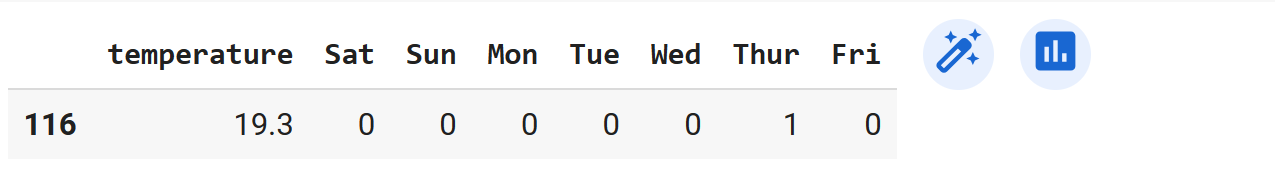

In [30]:
# select row(s) from the entire dataset that match the validation row
dffiltered1 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==19.3]
dffiltered1a = dffiltered1[dffiltered1.Thur == 1]

In [31]:
print('\nMatching record :\n', dffiltered1a)


Matching record :
      Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  ...  Sat  Sun  Thur  \
116    1    0    0    0    0    0    0    0    0    0  ...    0    0     1   

     Tue  Wed  year  temperature  wind_speed  scaledCollisions  num_collisions  
116    0    0  2021         19.3         1.3          0.686275             324  

[1 rows x 24 columns]


In [32]:
# first results was for example: 0.7295978, The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions :\n', np.round(linear_day_predictions2TD[0]*a21 +b21))
print('\nPredicted collisions :\n', np.round(0.7295978*a21 +b21))
print('\nActual collisions for matching record:\n', dffiltered1a.num_collisions)
print('\nDifference:\n', (0.7295978*a21 +b21)-dffiltered1a.num_collisions)
#print('\nDifference:\n', (linear_day_predictions2TD[0]*a21 +b21)-dffiltered1a.num_collisions)


Predicted collisions :
 333.0

Actual collisions for matching record:
 116    324
Name: num_collisions, dtype: int64

Difference:
 116    8.837951
Name: num_collisions, dtype: float64


### Model 2 - Validation result 2

The 2nd test value had a temperature of 7.2 and also occured on a Thursday.
The predicted scaled collision value was 0.60492176.

> Recorded collisions for the 2021 matching record: **223**  
> Predicted for 2021: 307
> Difference: 84 more predicted

> Recorded collisions for the 2022 matching record: **203**  
> Predicted for 2022: 292
> Difference: 89 more predicted.

The model does not provide good indicators.

The differences are 84 and 89 for 2021 and 2022 equivalents and these are quite substantial. The performance is quite poor as would be expected for the data inputs.


In [33]:
# The 2nd test values were
#test_features2[:2]
test_features2.iloc[1]

temperature    26.7
Sat             0.0
Sun             1.0
Mon             0.0
Tue             0.0
Wed             0.0
Thur            0.0
Fri             0.0
Name: 137, dtype: float64

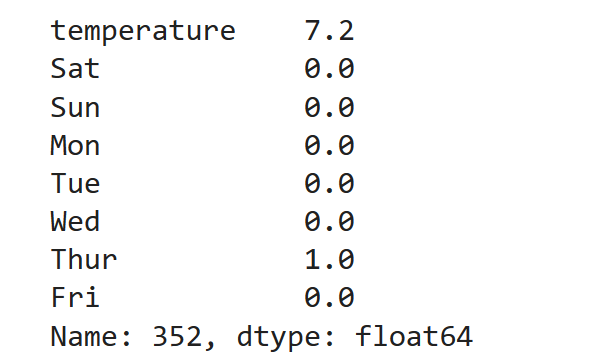

In [34]:
# select row(s) from the entire dataset that match the validation row
dffiltered2 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==7.2]
dffiltered2a = dffiltered2[dffiltered2.Thur == 1]

In [35]:
print('\nMatching record(s):\n', dffiltered2a)


Matching record(s):
      Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  ...  Sat  Sun  Thur  \
352    0    0    1    0    0    0    0    0    0    0  ...    0    0     1   
705    0    0    1    0    0    0    0    0    0    0  ...    0    0     1   

     Tue  Wed  year  temperature  wind_speed  scaledCollisions  num_collisions  
352    0    0  2021          7.2         2.8          0.191176             223  
705    0    0  2022          7.2         5.2          0.124324             203  

[2 rows x 24 columns]


In [36]:
# one of matching years was 2021 (for scaled collision calculation values)
# 0.60492176
# print('\nPredicted collisions (based on 2021):\n', np.round(linear_day_predictions2TD[1]*a21 +b21)) # 2021 scaled collisoins
print('\nPredicted collisions (based on 2021):\n', np.round(0.60492176*a21 +b21)) # 2021 scaled collisoins


Predicted collisions (based on 2021):
 307.0


In [37]:
# Recorded collisions for 2021 record
dffiltered2a['num_collisions'].loc[(dffiltered2a["Thur"]==1)   &  (dffiltered2a["year"]==2021)]

352    223
Name: num_collisions, dtype: int64

In [38]:
# print('\nPredicted collisions (based on 2022):\n', np.round(linear_day_predictions2TD[1]*a22 +b22)) # 2021 scaled collisoins
print('\nPredicted collisions (based on 2022):\n', np.round(0.60492176*a22 +b22)) # 2021 scaled collisoins


Predicted collisions (based on 2022):
 292.0


In [39]:
# Recorded collisions for 2022 record
dffiltered2a['num_collisions'].loc[(dffiltered2a["Thur"]==1)   &  (dffiltered2a["year"]==2022)]

705    203
Name: num_collisions, dtype: int64

In [40]:
print(292-203)

89


In [41]:
# first results was for example: 0.7295978, The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions :\n', np.round(linear_day_predictions2TD[0]*a21 +b21))
print('\nPredicted collisions based on 2021:\n', np.round(0.60492176*a21 +b21))
print('\nPredicted collisions based on 2022:\n', np.round(0.60492176*a22 +b22))

print('\nRecorded collisions for matching records:\n', dffiltered2a.num_collisions)
#print('\nDifference based on 2021:\n', (0.60492176*a22 +b21)-dffiltered2a.num_collisions)
#print('\nDifference based on 2022:\n', (0.60492176*a22 +b22)-dffiltered2a.num_collisions)

#print('\nDifference:\n', (linear_day_predictions2TD[0]*a21 +b21)-dffiltered1a.num_collisions)


Predicted collisions based on 2021:
 307.0

Predicted collisions based on 2022:
 292.0

Recorded collisions for matching records:
 352    223
705    203
Name: num_collisions, dtype: int64


## Test also with hypothetical data and run

In [42]:
# make sure the labels match up with the dataframe from earlier.
input_2 = pd.DataFrame.from_dict(data =
				{
         'temperature' : [10, 6, 8],
         'Sat' : [0,0,0],
         'Sun' : [0,0,0],
         'Mon' : [1,1,1],
         'Tue' : [0,0,0],
         'Wed' : [0,0,0],
         'Thur' : [0,0,0],
         'Fri' : [0,0,0],
        })

In [43]:
# Make predictions by the model on the hypothetical data
linear_day_predictions2 = dnn_model_2.predict(input_2[:3])*SCALE_NUM_COLLISIONS
linear_day_predictions2

1/1 [==============================] - 0s 74ms/step


array([[0.55414206],
       [0.52666676],
       [0.54880947]], dtype=float32)

#### Convert results for hypothetical data to collisions based on scaledCollisions for 2022

In [44]:
# Make the predictions by the model on the hypothetical data and convert
linear_day_predictions2Converted = dnn_model_2.predict(input_2[:3])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions2Converted

1/1 [==============================] - 0s 21ms/step


array([[282.5163 ],
       [277.43335],
       [281.52975]], dtype=float32)

The above converted collision results for hypothetical data are in line with the pattern for 2022.

# Model 3 DNN - One-hot encoded days of week, months with temperature


This model is a simple model that only includes the days of the week, months and temperature. I would expect a model that can compute the effect of different years and the relationship of months within the years to perform better than this Model 3.

In [45]:
# remove some columns for this model
dfwc_DNN_dow_temp_mon = dfwc_DNN_mm_day_yr_temp_wind.drop(
    columns=[
        'num_collisions',
       # 'Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
        'wind_speed', 'year' #'No.Snow','Snow','No.fog','Fog','Calm','Gentle_breeze','Light_air','Light_breeze','Moderate_breeze','Cold','Freezing.or.below','Hot','Mild','Very.warm','Warm','One','Ten','Three','Four','Five','Six','Seven','Eight','Nine','Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'
        ])

In [46]:
# check data - DNN data set to include daysofweek, temperature, scaledCollisions.
# removed year, months
dfwc_DNN_dow_temp_mon[:5]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Sep,Fri,Mon,Sat,Sun,Thur,Tue,Wed,temperature,scaledCollisions
509,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,20.8,0.686486
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,14.1,0.823529
319,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2.6,0.392157
260,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,20.4,0.549020
303,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,11.3,0.529412


### View dataset columns

In [47]:
# iterating the columns
for col in dfwc_DNN_dow_temp_mon.columns:
    print(col)
# This one has month, day of week, year, temperature, wind speed, scaledCollisions

Apr
Aug
Dec
Feb
Jan
Jul
Jun
Mar
May
Nov
Oct
Sep
Fri
Mon
Sat
Sun
Thur
Tue
Wed
temperature
scaledCollisions


In [48]:
dnn_dow_temp_mon_input_data = [dfwc_DNN_dow_temp_mon["temperature"],
                  dfwc_DNN_dow_temp_mon["Sat"], dfwc_DNN_dow_temp_mon["Sun"], dfwc_DNN_dow_temp_mon["Mon"], dfwc_DNN_dow_temp_mon["Tue"], dfwc_DNN_dow_temp_mon["Wed"], dfwc_DNN_dow_temp_mon["Thur"], dfwc_DNN_dow_temp_mon["Fri"],
                  dfwc_DNN_dow_temp_mon["Jan"], dfwc_DNN_dow_temp_mon["Feb"], dfwc_DNN_dow_temp_mon["Mar"], dfwc_DNN_dow_temp_mon["Apr"], dfwc_DNN_dow_temp_mon["May"], dfwc_DNN_dow_temp_mon["Jun"], dfwc_DNN_dow_temp_mon["Jul"], dfwc_DNN_dow_temp_mon["Aug"], dfwc_DNN_dow_temp_mon["Sep"], dfwc_DNN_dow_temp_mon["Oct"], dfwc_DNN_dow_temp_mon["Nov"], dfwc_DNN_dow_temp_mon["Dec"],
                  dfwc_DNN_dow_temp_mon["scaledCollisions"]]
headers3 = ["temperature", "Sat","Sun","Mon","Tue","Wed","Thur","Fri","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","scaledCollisions"]
dnn_dow_temp_mon_input = pd.concat(dnn_dow_temp_mon_input_data, axis=1, keys=headers3)


In [49]:
dnn_dow_temp_mon_input.head()

,temperature,Sat,Sun,Mon,Tue,Wed,Thur,Fri,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,scaledCollisions
509,20.8,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.686486
291,14.1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.823529
319,2.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.392157
260,20.4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.549020
303,11.3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.529412


### Training and test datasets

In [50]:
training_dataset3 = dnn_dow_temp_mon_input.sample(frac=0.8, random_state=0)
test_dataset3 = dnn_dow_temp_mon_input.drop(training_dataset3.index)

In [51]:
training_features3 = training_dataset3.copy()
test_features3 = test_dataset3.copy()

training_labels3 = training_features3.pop('scaledCollisions')
test_labels3 = test_features3.pop('scaledCollisions')

In [52]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [53]:
training_labels3 = training_labels3/SCALE_NUM_COLLISIONS
test_labels3 = test_labels3/SCALE_NUM_COLLISIONS

In [54]:
for col in dnn_dow_temp_mon_input.columns:
    print(col)
# 20 excluding scaled collisions

temperature
Sat
Sun
Mon
Tue
Wed
Thur
Fri
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
scaledCollisions


## Model 3 - model specification

In [55]:
normaliser3 = tf.keras.layers.Normalization(axis=-1)
normaliser3.adapt(np.array(training_features3))

In [56]:
# Normalisation layer (22 inputs), 2 layers of 48, with 1 output.
# The 48 can be adjusted to improve the net.
dnn_model_3 = keras.Sequential([
      normaliser3,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_3.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [57]:
# Print out the statistics
dnn_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 20)               41        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 48)                1008      
                                                                 
 dense_4 (Dense)             (None, 48)                2352      
                                                                 
 dense_5 (Dense)             (None, 1)                 49        
                                                                 
Total params: 3,450
Trainable params: 3,409
Non-trainable params: 41
_________________________________________________________________


## Model 3 - Train the model

We call fit() to train the model and repeatedly iterate over the dataset for 100 epochs.This specifies to use 20% of the data for validation.

In [58]:
%%time
history3 = dnn_model_3.fit(
    training_features3,
    training_labels3,
    #batch_size = 64, #  slice the data into "batches"
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 7.25 s, sys: 278 ms, total: 7.52 s
Wall time: 7.92 s


## Evaluate model 3 on the test data (0.1304444670677185)


In this iteration we get a result of 0.1304444670677185.

In [59]:
# We want to minimise this. The model with the lowest is the best.
dnn_model_3_results = dnn_model_3.evaluate(test_features3, test_labels3, verbose=1)
print(dnn_model_3_results)

6/6 [==============================] - 0s 2ms/step - loss: 0.1598
0.15980640053749084


In [60]:
#history3.history

## Make predictions based on test data

In [61]:
# Make the predictions by the model on tHE TEST data
print("Generate predictions for 10 samples")
linear_day_predictions3TD = dnn_model_3.predict(test_features3[:10])*SCALE_NUM_COLLISIONS
linear_day_predictions3TD
#print("predictions shape:", linear_day_predictions2TD.shape)

Generate predictions for 10 samples
1/1 [==============================] - 0s 71ms/step


array([[0.6038289 ],
       [0.7746661 ],
       [0.6614747 ],
       [0.67200875],
       [0.73192966],
       [0.42515486],
       [0.6520885 ],
       [0.70751685],
       [0.40871564],
       [0.7335808 ]], dtype=float32)

#### Convert to collisions

In [62]:
# Make the predictions by the model on the TEST DATA data and convert based on scaledCollisions for 2022
linear_day_predictions3Converted = np.round(dnn_model_3.predict(test_features3[:10])*a22 +b22)
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions3Converted

1/1 [==============================] - 0s 23ms/step


array([[292.],
       [323.],
       [302.],
       [304.],
       [315.],
       [259.],
       [301.],
       [311.],
       [256.],
       [316.]], dtype=float32)

The above converted collision results are within a plausible range for the pattern for 2022 as an example.

## Compare the Model 3 prediction to the recorded values for collisions in the validation dataset

The results for the validation records improved for this model with differences of 10 and 11 between the predicted and recorded values.

### Model 3 - Validation result 1

In an example, the difference between the predicted collisions and the collisions for the single matching record was 20.

In [63]:
# The first 1 test values were
#test_features3[:1]

In [64]:
# select row(s) from the entire dataset that match the validation row
#dfM31 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==2.3]
#dfM31b = dfM31[dfM31.Sun == 1]
#dfM31a = dfM31b[dfM31b.Nov == 1]

In [65]:
#print('\nMatching record :\n', dfM31a)

In [66]:
# The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions :\n', np.round(linear_day_predictions3TD[0]*a21 +b21))
#print('\nRecorded collisions for matching record:\n', dfM31a.num_collisions)
#print('\nDifference:\n',  np.round((linear_day_predictions3TD[0]*a21 +b21)-dfM31a.num_collisions))

### Model 3 - Validation result 2

This time there is a difference of 11 between the predicted and recorded collision values.

In [67]:
# The 2nd test values were
#test_features3.iloc[1]

In [68]:
# select row(s) from the entire dataset that match the validation row
#dfM32 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==14.2]
#dfM32b = dfM32[dfM32.Tue == 1]
#dfM32a = dfM32b[dfM32b.Apr == 1]

In [69]:
#print('\nMatching record(s):\n', dfM32a)

In [70]:
# matching years was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions (based on 2021):\n', np.round(linear_day_predictions2TD[1]*a21 +b21)) # 2021 scaled collisoins

In [71]:
# The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions (Based on 2021):\n', np.round(linear_day_predictions2TD[1]*a21 +b21))
#print('\nActual collisions for matching record:\n', dfM32a.num_collisions)
#print('\nDifference:\n', np.round(dfM32a.num_collisions- (linear_day_predictions2TD[1]*a21 +b21)))

### Model 3 - Validation result 3

In [72]:
# The 3rd test values were
#test_features3.iloc[2]

In [73]:
# select row(s) from the entire dataset that match the validation row
#dfM33 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==10.0]
#dfM33b = dfM33[dfM33.Sat == 1]
#dfM33a = dfM33b[dfM33b.Mar == 1]

In [74]:
#print('\nMatching record(s):\n', dfM33a)

In [75]:
# select row(s) from the entire dataset that match the validation row
#dfM33aa = dfM33a[dfM33a.year ==2023]
#dfM33ab = dfM33a[dfM33a.year ==2022]

In [76]:
# There are 2 matching years (for scaled collision calculation values)
#print('\nActual collisions for matching records:\n', dfM33a.num_collisions)
#print('\nPredicted collisions based on 2022:\n', np.round(linear_day_predictions3TD[2]*a22 +b22))
#print('\nDifference (based on 2022):\n',  np.round((linear_day_predictions3TD[2]*a22 +b22)-dfM33ab.num_collisions))
#print('\nPredicted collisions based on 2023:\n', np.round(linear_day_predictions3TD[2]*a23 +b23))
#print('\nDifference (based on 2023):\n',  np.round((linear_day_predictions3TD[2]*a22 +b22)-dfM33aa.num_collisions))


## Hypothectical data

In [77]:
# make sure the labels match up with the dataframe from earlier.
input_3 = pd.DataFrame.from_dict(data =

		{
         'temperature' : [6, 19, 23],
         'Sat' : [0,0,0],
         'Sun' : [0,0,0],
         'Mon' : [1,1,1],
         'Tue' : [0,0,0],
         'Wed' : [0,0,0],
         'Thur' : [0,0,0],
         'Fri' : [0,0,0],
          'Jan' : [0,1,0],
         'Feb' : [0,0,0],
         'Mar' : [0,0,0],
         'Apr' : [0,0,0],
         'May' : [0,1,0],
         'Jun' : [0,0,0],
         'Jul' : [0,0,0],
         'Aug' : [0,0,1],
         'Sep' : [0,0,0],
         'Oct' : [0,0,0],
         'Nov' : [0,0,0],
         'Dec' : [0,0,0]
        })


In [78]:
# Make the predictions by the model on the hypothetical data
linear_day_predictions3 = dnn_model_3.predict(input_3[:3])*SCALE_NUM_COLLISIONS
linear_day_predictions3

1/1 [==============================] - 0s 65ms/step


array([[0.29337198],
       [0.6661152 ],
       [0.4017328 ]], dtype=float32)

#### Convert results for hypothetical data to collisions based on scaledCollisions for 2022

In [79]:
linear_day_predictions3Converted = dnn_model_3.predict(input_3[:3])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions3Converted

1/1 [==============================] - 0s 21ms/step


array([[234.27382],
       [303.23132],
       [254.32057]], dtype=float32)

# Model 1 DNN dataset - one-hot encoded month, days of week with temperature and wind speed

In [80]:
# remove some columns for this model
dfwc_DNN_dow_temp_mon_wnd = dfwc_DNN_mm_day_yr_temp_wind.drop(
    columns=[ 'num_collisions', 'year' #'No.Snow','Snow','No.fog','Fog','Calm','Gentle_breeze','Light_air','Light_breeze','Moderate_breeze','Cold','Freezing.or.below','Hot','Mild','Very.warm','Warm','One','Ten','Three','Four','Five','Six','Seven','Eight','Nine','Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'
             ])

In [81]:
# check data - DNN data set to include months, daysofweek, temperature, scaledCollisions. Added num_collisions as a comparison reference also)
dfwc_DNN_dow_temp_mon_wnd[:5]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Fri,Mon,Sat,Sun,Thur,Tue,Wed,temperature,wind_speed,scaledCollisions
509,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,20.8,5.0,0.686486
291,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,14.1,6.3,0.823529
319,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,2.6,8.4,0.392157
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,20.4,8.8,0.549020
303,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,11.3,3.2,0.529412


### View the columns

In [82]:
# iterating the columns
for col in dfwc_DNN_dow_temp_mon_wnd.columns:
    print(col)
# This one has month, day of week, year, temperature, wind speed, num_trips

Apr
Aug
Dec
Feb
Jan
Jul
Jun
Mar
May
Nov
Oct
Sep
Fri
Mon
Sat
Sun
Thur
Tue
Wed
temperature
wind_speed
scaledCollisions


In [83]:
dfwc_dnn_dow_temp_mon_wnd_input_data = [
                  dfwc_DNN_dow_temp_mon_wnd["temperature"],
                  dfwc_DNN_dow_temp_mon_wnd["wind_speed"],
                  dfwc_DNN_dow_temp_mon_wnd["Sat"], dfwc_DNN_dow_temp_mon_wnd["Sun"], dfwc_DNN_dow_temp_mon_wnd["Mon"], dfwc_DNN_dow_temp_mon_wnd["Tue"], dfwc_DNN_dow_temp_mon_wnd["Wed"], dfwc_DNN_dow_temp_mon_wnd["Thur"], dfwc_DNN_dow_temp_mon_wnd["Fri"],
                  dfwc_DNN_dow_temp_mon_wnd["Jan"], dfwc_DNN_dow_temp_mon_wnd["Feb"], dfwc_DNN_dow_temp_mon_wnd["Mar"], dfwc_DNN_dow_temp_mon_wnd["Apr"], dfwc_DNN_dow_temp_mon_wnd["May"], dfwc_DNN_dow_temp_mon_wnd["Jun"], dfwc_DNN_dow_temp_mon_wnd["Jul"], dfwc_DNN_dow_temp_mon_wnd["Aug"], dfwc_DNN_dow_temp_mon_wnd["Sep"], dfwc_DNN_dow_temp_mon_wnd["Oct"], dfwc_DNN_dow_temp_mon_wnd["Nov"], dfwc_DNN_dow_temp_mon_wnd["Dec"],
                  dfwc_DNN_dow_temp_mon_wnd["scaledCollisions"]]
headers1 = ["temperature", "wind_speed", "Sat","Sun","Mon","Tue","Wed","Thur","Fri","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
           "scaledCollisions"]
dfwc_dnn_dow_temp_mon_wnd_input = pd.concat(dfwc_dnn_dow_temp_mon_wnd_input_data, axis=1, keys=headers1)


In [84]:
dfwc_dnn_dow_temp_mon_wnd_input.head()

,temperature,wind_speed,Sat,Sun,Mon,Tue,Wed,Thur,Fri,Jan,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,scaledCollisions
509,20.8,5.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.686486
291,14.1,6.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.823529
319,2.6,8.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.392157
260,20.4,8.8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.549020
303,11.3,3.2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.529412


### Training and test datasets

In [85]:
training_dataset1 = dfwc_dnn_dow_temp_mon_wnd_input.sample(frac=0.8, random_state=0)
test_dataset1 = dfwc_dnn_dow_temp_mon_wnd_input.drop(training_dataset1.index)

In [86]:
training_features1 = training_dataset1.copy()
test_features1 = test_dataset1.copy()

training_labels1 = training_features1.pop('scaledCollisions')
test_labels1 = test_features1.pop('scaledCollisions')

In [87]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [88]:
training_labels1 = training_labels1/SCALE_NUM_COLLISIONS
test_labels1 = test_labels1/SCALE_NUM_COLLISIONS

In [89]:
for col in dfwc_dnn_dow_temp_mon_wnd_input.columns:
    print(col)
# 21 excluding scaled collisions

temperature
wind_speed
Sat
Sun
Mon
Tue
Wed
Thur
Fri
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
scaledCollisions


## Model specification

In [90]:
normaliser1 = tf.keras.layers.Normalization(axis=-1)
normaliser1.adapt(np.array(training_features1))

In [91]:
# Normalisation layer (21 inputs), 2 layers of 46, with 1 output.
# The 48 can be adjusted to improve the net.
dnn_model_1 = keras.Sequential([
      normaliser1,
      layers.Dense(46, activation='relu'),
      layers.Dense(46, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [92]:
# Print out the statistics
dnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 21)               43        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 46)                1012      
                                                                 
 dense_7 (Dense)             (None, 46)                2162      
                                                                 
 dense_8 (Dense)             (None, 1)                 47        
                                                                 
Total params: 3,264
Trainable params: 3,221
Non-trainable params: 43
_________________________________________________________________


### Train the model

We call fit() to train the model by slicing the data into "batches" of size batch_size, and repeatedly iterated over the dataset for 100 epochs.
This specifies to use 20% of the data for validation.

In [93]:
%%time
history1 = dnn_model_1.fit(
    training_features1,
    training_labels1,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 7.07 s, sys: 263 ms, total: 7.33 s
Wall time: 11 s


In [94]:
#history1.history

### Evaluate model 1 on the test data (0.14498303830623627.)


Adding wind, the result is 0.14498303830623627.

In [95]:
# remember, we want to minimise this. The model with the lowest is the best.
dnn_model_1_results = dnn_model_1.evaluate(test_features1, test_labels1, verbose=1)
print(dnn_model_1_results)

6/6 [==============================] - 0s 3ms/step - loss: 0.1555
0.15548890829086304


### Hypothetical data for initial comparison for initial checking/diagnostics

In [96]:
# make sure the labels match up with the dataframe from earlier.
input_1 = pd.DataFrame.from_dict(data =
				{
   #      'year' : [2021,2022,2023],
         'temperature' : [3, 31.2, 25],
         'wind_speed' : [5.0, 3.0, 8.0],
         'Sat' : [0,0,0],
         'Sun' : [0,0,0],
         'Mon' : [1,0,0],
         'Tue' : [0,0,0],
         'Wed' : [0,1,0],
         'Thur' :[0,0,0],
         'Fri' : [0,0,1],
         'Jan' : [1,0,0],
         'Feb' : [0,0,0],
         'Mar' : [0,0,0],
         'Apr' : [0,0,0],
         'May' : [0,0,0],
         'Jun' : [0,0,0],
         'Jul' : [0,0,0],
         'Aug' : [1,0,0],
         'Sep' : [0,0,1],
         'Oct' : [0,0,0],
         'Nov' : [0,0,0],
         'Dec' : [0,0,0],
        })


In [97]:
# Make the predictions by the model on the hypothetical data
linear_day_predictions1 = dnn_model_1.predict(input_1[:3])*SCALE_NUM_COLLISIONS
linear_day_predictions1

1/1 [==============================] - 0s 84ms/step


array([[0.23417787],
       [0.60600215],
       [0.9590841 ]], dtype=float32)

#### Convert results for hypothetical data to collisions based on scaledCollisions for 2022

In [98]:
# Make the predictions by the model on the hypothetical data
linear_day_predictions1Converted = dnn_model_1.predict(input_1[:3])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions1Converted

1/1 [==============================] - 0s 25ms/step


array([[223.3229 ],
       [292.1104 ],
       [357.43054]], dtype=float32)

The above converted collision results for the hypothetical data for 2022 are within a plausible range for the pattern for 2022.

### Make predictions based on test data

In [99]:
# Make the predictions by the model on tHE TEST data
print("Generate predictions for 10 samples")
linear_day_predictions1TD = dnn_model_1.predict(test_features1[:10])*SCALE_NUM_COLLISIONS
linear_day_predictions1TD
#print("predictions shape:", linear_day_predictions2TD.shape)

Generate predictions for 10 samples
1/1 [==============================] - 0s 28ms/step


array([[0.53468734],
       [0.79575527],
       [0.5457556 ],
       [0.5701257 ],
       [0.469661  ],
       [0.4755596 ],
       [0.6342331 ],
       [0.82653767],
       [0.50004715],
       [0.52762467]], dtype=float32)

#### Convert to collisions

In [100]:
# Make the predictions by the model on the TEST DATA data and convert based on scaledCollisions for 2022
linear_day_predictions3Converted = dnn_model_3.predict(test_features3[:10])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions3Converted

1/1 [==============================] - 0s 30ms/step


array([[291.70834],
       [323.31323],
       [302.3728 ],
       [304.32162],
       [315.40698],
       [258.65366],
       [300.63638],
       [310.89062],
       [255.6124 ],
       [315.71246]], dtype=float32)

#### Sample scaled collision output and collisions from a test run on validation data

We will save a specific set of results and calculate the number of collisions for 2021-2023.

In [101]:
mod1ResultEx  = pd.DataFrame.from_dict(data =
				{'Validation result for 10 records from a test run' : [0.55999464,0.6965343 ,0.3836175 ,0.79850507,0.7144525 ,0.6276089,0.21966459,0.5139455 ,0.42869028,0.43682483]})
mod1ResultEx

,Validation result for 10 records from a test run
0,0.559995
1,0.696534
2,0.383618
3,0.798505
4,0.714453
5,0.627609
6,0.219665
7,0.513946
8,0.428690
9,0.436825


In [102]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod1ResultEx21 = np.round((mod1ResultEx[:10])*a21 +b21)
mod1ResultEx21

,Validation result for 10 records from a test run
0,298.0
1,326.0
2,262.0
3,347.0
4,330.0
5,312.0
6,229.0
7,289.0
8,271.0
9,273.0


In [103]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod1ResultEx22 = np.round((mod1ResultEx[:10])*a22 +b22)
mod1ResultEx22

,Validation result for 10 records from a test run
0,284.0
1,309.0
2,251.0
3,328.0
4,312.0
5,296.0
6,221.0
7,275.0
8,259.0
9,261.0


In [104]:
# Convert scaled collisions to collisions based on 2023 min and max records
mod1ResultEx23 = np.round((mod1ResultEx[:10])*a23 +b23)
mod1ResultEx23

,Validation result for 10 records from a test run
0,232.0
1,258.0
2,199.0
3,277.0
4,261.0
5,245.0
6,169.0
7,224.0
8,208.0
9,209.0


# Model 4 DNN - one-hot encoded months, days of week with temperature, wind speed and year


Based on the previous results the Year should be an improvement as the DNN should be able to improve the predictions by taking the interactions with the year into account.  

In [105]:
# remove num_collisions columns for this modeel
dfwc_DNN_mm_day_yr_temp_wind_a = dfwc_DNN_mm_day_yr_temp_wind.drop(columns=['num_collisions'])

In [106]:
# check data - DNN data set to include months, daysofweek, temperature, scaledCollisions. Added num_collisions as a comparison reference also)
dfwc_DNN_mm_day_yr_temp_wind_a[:5]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Mon,Sat,Sun,Thur,Tue,Wed,year,temperature,wind_speed,scaledCollisions
509,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,2022,20.8,5.0,0.686486
291,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2021,14.1,6.3,0.823529
319,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,2021,2.6,8.4,0.392157
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2021,20.4,8.8,0.549020
303,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,2021,11.3,3.2,0.529412


In [107]:
# iterating the columns
for col in dfwc_DNN_mm_day_yr_temp_wind_a.columns:
    print(col)
# This one has month, day of week, year, temperature, wind speed, num_trips

Apr
Aug
Dec
Feb
Jan
Jul
Jun
Mar
May
Nov
Oct
Sep
Fri
Mon
Sat
Sun
Thur
Tue
Wed
year
temperature
wind_speed
scaledCollisions


In [108]:
dfwc_dnn_dow_temp_mon_wnd_yr_input_data = [
                  dfwc_DNN_mm_day_yr_temp_wind_a["year"],
                  dfwc_DNN_mm_day_yr_temp_wind_a["temperature"],
                  dfwc_DNN_mm_day_yr_temp_wind_a["wind_speed"],
                  dfwc_DNN_mm_day_yr_temp_wind_a["Sat"], dfwc_DNN_mm_day_yr_temp_wind_a["Sun"], dfwc_DNN_mm_day_yr_temp_wind_a["Mon"], dfwc_DNN_mm_day_yr_temp_wind_a["Tue"], dfwc_DNN_mm_day_yr_temp_wind_a["Wed"], dfwc_DNN_mm_day_yr_temp_wind_a["Thur"],dfwc_DNN_mm_day_yr_temp_wind_a["Fri"],
                  dfwc_DNN_mm_day_yr_temp_wind_a["Jan"], dfwc_DNN_mm_day_yr_temp_wind_a["Feb"], dfwc_DNN_mm_day_yr_temp_wind_a["Mar"], dfwc_DNN_mm_day_yr_temp_wind_a["Apr"], dfwc_DNN_mm_day_yr_temp_wind_a["May"], dfwc_DNN_mm_day_yr_temp_wind_a["Jun"], dfwc_DNN_mm_day_yr_temp_wind_a["Jul"], dfwc_DNN_mm_day_yr_temp_wind_a["Aug"], dfwc_DNN_mm_day_yr_temp_wind_a["Sep"], dfwc_DNN_mm_day_yr_temp_wind_a["Oct"], dfwc_DNN_mm_day_yr_temp_wind_a["Nov"], dfwc_DNN_mm_day_yr_temp_wind_a["Dec"],
                  dfwc_DNN_mm_day_yr_temp_wind_a["scaledCollisions"]]
headers3 = ["year", "temperature", "wind_speed", "Sat","Sun","Mon","Tue","Wed","Thur","Fri","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
           "scaledCollisions"]
dfwc_dnn_dow_temp_mon_wnd_yr_input = pd.concat(dfwc_dnn_dow_temp_mon_wnd_yr_input_data, axis=1, keys=headers3)


In [109]:
dfwc_dnn_dow_temp_mon_wnd_yr_input.head()

,year,temperature,wind_speed,Sat,Sun,Mon,Tue,Wed,Thur,Fri,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,scaledCollisions
509,2022,20.8,5.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.686486
291,2021,14.1,6.3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.823529
319,2021,2.6,8.4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.392157
260,2021,20.4,8.8,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.549020
303,2021,11.3,3.2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.529412


### Training and test datasets

In [110]:
training_dataset4 = dfwc_dnn_dow_temp_mon_wnd_yr_input.sample(frac=0.8, random_state=0)
test_dataset4 = dfwc_dnn_dow_temp_mon_wnd_yr_input.drop(training_dataset4.index)

In [111]:
training_features4 = training_dataset4.copy()
test_features4 = test_dataset4.copy()

training_labels4 = training_features4.pop('scaledCollisions')
test_labels4 = test_features4.pop('scaledCollisions')

In [112]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [113]:
training_labels4 = training_labels4/SCALE_NUM_COLLISIONS
test_labels4 = test_labels4/SCALE_NUM_COLLISIONS

In [114]:
for col in dfwc_dnn_dow_temp_mon_wnd_yr_input.columns:
    print(col)
# 22 excluding scaled collisions

year
temperature
wind_speed
Sat
Sun
Mon
Tue
Wed
Thur
Fri
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
scaledCollisions


## Model specification

In [115]:
normaliser4 = tf.keras.layers.Normalization(axis=-1)
normaliser4.adapt(np.array(training_features4))

In [116]:
# Normalisation layer (22 inputs), 2 layers of 46, with 1 output.
# The 48 can be adjusted to improve the net.
dnn_model_4 = keras.Sequential([
      normaliser4,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_4.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [117]:
# Print out the statistics
dnn_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 22)               45        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 48)                1104      
                                                                 
 dense_10 (Dense)            (None, 48)                2352      
                                                                 
 dense_11 (Dense)            (None, 1)                 49        
                                                                 
Total params: 3,550
Trainable params: 3,505
Non-trainable params: 45
_________________________________________________________________


### Train the model

In [118]:
%%time
history4 = dnn_model_4.fit(
    training_features4,
    training_labels4,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 7.39 s, sys: 270 ms, total: 7.66 s
Wall time: 8.06 s


In [119]:
#history4.history

### Evaluate model 4 on the test data - 0.14182527363300323


In [120]:
# we want to minimise this. The model with the lowest is the best.
dnn_model_4_results = dnn_model_4.evaluate(test_features4, test_labels4, verbose=1)
print(dnn_model_4_results)

6/6 [==============================] - 0s 2ms/step - loss: 0.1531
0.15312901139259338


### Make predictions based on test data

In [121]:
# Make the predictions by the model on tHE TEST data
print("Generate predictions for 10 samples")
linear_day_predictions4TD = dnn_model_4.predict(test_features4[:10])*SCALE_NUM_COLLISIONS
linear_day_predictions4TD
#print("predictions shape:", linear_day_predictions4TD.shape)

Generate predictions for 10 samples


1/1 [==============================] - 0s 81ms/step


array([[0.6923064 ],
       [0.75036436],
       [0.5306097 ],
       [0.6593354 ],
       [0.5731106 ],
       [0.16558267],
       [0.59583396],
       [0.75916606],
       [0.6769785 ],
       [0.51561004]], dtype=float32)

#### Convert to collisions

In [122]:
# Make the predictions by the model on the TEST DATA data and convert based on scaledCollisions for 2022
linear_day_predictions4TDConverted = np.round(dnn_model_4.predict(test_features4[:10])*a22 +b22)
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions4TDConverted

1/1 [==============================] - 0s 22ms/step


array([[308.],
       [319.],
       [278.],
       [302.],
       [286.],
       [211.],
       [290.],
       [320.],
       [305.],
       [275.]], dtype=float32)

The above converted collision results are within a plausible range for the pattern for 2022 as an example.

#### Sample scaled collision output and collisions from a test run on validation data

We will save a specific set of results and calculate the number of collisions for 2021-2023.

In [123]:
mod4ResultEx  = pd.DataFrame.from_dict(data =
				{'Validation result for 10 records from a test run' : [
						0.5791915 ,0.2892152 ,0.33034623,0.8489659 ,0.6682229 ,0.661425  ,0.28268254,0.6141364 ,0.45860088,0.42453757]})
mod4ResultEx

,Validation result for 10 records from a test run
0,0.579191
1,0.289215
2,0.330346
3,0.848966
4,0.668223
5,0.661425
6,0.282683
7,0.614136
8,0.458601
9,0.424538


In [124]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod4ResultEx21 = np.round((mod4ResultEx[:10])*a21 +b21)
mod4ResultEx21

,Validation result for 10 records from a test run
0,302.0
1,243.0
2,251.0
3,357.0
4,320.0
5,319.0
6,242.0
7,309.0
8,278.0
9,271.0


In [125]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod4ResultEx22 = np.round((mod4ResultEx[:10])*a22 +b22)
mod4ResultEx22

,Validation result for 10 records from a test run
0,287.0
1,234.0
2,241.0
3,337.0
4,304.0
5,302.0
6,232.0
7,294.0
8,265.0
9,259.0


In [126]:
# Convert scaled collisions to collisions based on 2023 min and max records
mod4ResultEx23 = np.round((mod4ResultEx[:10])*a23 +b23)
mod4ResultEx23

,Validation result for 10 records from a test run
0,236.0
1,182.0
2,189.0
3,286.0
4,252.0
5,251.0
6,181.0
7,242.0
8,213.0
9,207.0


### Define hypotectical data and run

In [127]:
# make sure the labels match up with the dataframe from earlier.
input_4 = pd.DataFrame.from_dict(data =
				{
        'year' : [2022,2022,2022],
         'temperature' : [15.8, 31.2, 25],
         'wind_speed' : [20.0, 30.0, 15.0],
         'Sat' : [0,0,0],
         'Sun' : [0,0,0],
         'Mon' : [1,0,0],
         'Tue' : [0,0,0],
         'Wed' : [0,1,0],
         'Thur' :[0,0,0],
         'Fri' : [0,0,1],
         'Jan' : [0,0,0],
         'Feb' : [0,0,0],
         'Mar' : [1,0,0],
         'Apr' : [0,0,0],
         'May' : [0,0,0],
         'Jun' : [0,0,1],
         'Jul' : [0,0,0],
         'Aug' : [0,1,0],
         'Sep' : [0,0,0],
         'Oct' : [0,0,0],
         'Nov' : [0,0,0],
         'Dec' : [0,0,0],
        })


In [128]:
# Make the predictions by the model on the hypothetical data
linear_day_predictions4 = dnn_model_4.predict(input_4[:3])*SCALE_NUM_COLLISIONS
linear_day_predictions4

1/1 [==============================] - 0s 22ms/step


array([[0.85469043],
       [1.3597028 ],
       [0.8791951 ]], dtype=float32)

#### Convert results for hypothetical data to collisions based on scaledCollisions for 2022

In [129]:
linear_day_predictions4Converted = dnn_model_4.predict(input_4[:3])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions4Converted

1/1 [==============================] - 0s 27ms/step


array([[338.11774],
       [431.54504],
       [342.6511 ]], dtype=float32)

The above converted collision results for the hypothetical data for 2022 are within a plausible range for the pattern for 2022.

### Compare the Model 4 prediction to the recorded values for collisions in the validation dataset

#### Model 4 - Validation result 1

The difference between the predicted collisions and the collisions for the single matching record was only 2 on this occasion.

In [130]:
# The first 1 test values were
#test_features4[:1]

In [131]:
# select row(s) from the entire dataset that match the validation row
#dfM41 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==2.3]
#dfM41b = dfM41[dfM41.Sun == 1]
#dfM41c = dfM41b[dfM41b.Nov == 1]
#dfM41a = dfM41c[dfM41c.year == 2021]

In [132]:
#print('\nMatching record :\n', dfM41a)

In [133]:
# The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions :\n', np.round(linear_day_predictions4TD[0]*a21 +b21))
#print('\nActual collisions for matching record:\n', dfM41a.num_collisions)
#print('\nDifference:\n',  np.round((linear_day_predictions4TD[0]*a21 +b21)-dfM41a.num_collisions))

#### Model 4 - Validation result 2

This time there is a difference of 16 between the predicted and recorded collision values.

In [134]:
# The 2nd test values were
#test_features4.iloc[1]

In [135]:
# select row(s) from the entire dataset that match the validation row
#dfM42 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==14.2]
#dfM42b = dfM42[dfM42.Tue == 1]
#dfM42c = dfM42b[dfM42b.Apr == 1]
#dfM42a = dfM42c[dfM42c.year == 2021]

In [136]:
#print('\nMatching record(s):\n', dfM42a)

In [137]:
# matching years was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions (based on 2021):\n', np.round(linear_day_predictions4TD[1]*a21 +b21)) # 2021 scaled collisoins

In [138]:
# The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions (Based on 2021):\n', np.round(linear_day_predictions4TD[1]*a21 +b21))
#print('\nActual collisions for matching record:\n', dfM42a.num_collisions)
#print('\nDifference:\n', np.round(dfM42a.num_collisions- (linear_day_predictions4TD[1]*a21 +b21)))

#### Model 4 - Validation result 3

This time in the test there was a difference of 8.

In [139]:
# The 3rd test values were
#test_features4.iloc[2]

In [140]:
# select row(s) from the entire dataset that match the validation row
#dfM43 = dfwc_DNN_mm_day_yr_temp_wind[dfwc_DNN_mm_day_yr_temp_wind.temperature ==10]
#dfM43b = dfM43[dfM43.Sat == 1]
#dfM43c = dfM43b[dfM43b.Mar == 1]
#dfM43a = dfM43c[dfM43c.year == 2023]

In [141]:
#print('\nMatching record:\n', dfM43a)

In [142]:
# select row(s) from the entire dataset that match the validation row
#dfM33aa = dfM33a[dfM33a.year ==2023]
#dfM33ab = dfM33a[dfM33a.year ==2022]

In [143]:
# There are 2 matching years (for scaled collision calculation values)
#print('\nActual collisions for matching records:\n', dfM43a.num_collisions)
#print('\nPredicted collisions based on 2023:\n', np.round(linear_day_predictions3TD[2]*a23 +b23))
#print('\nDifference (based on 2023):\n',  np.round((linear_day_predictions3TD[2]*a23 +b23)-dfM43a.num_collisions))

# Import combination dataset including mix of non-one-hot encoded and 1-hot encoded features

In [144]:
# weatherCollisionsDNNMix3 Definition of this one in R was :
# months, daysofweek, year1hot, snow_dnn, fog_dnn, bft_wind_scale_dnn, temperature_cat, vis_dnn2, precipitation_dnn,
# wc2021to2023_n_merged2$scaledCollisions, wc2021to2023_n_merged2$temperature, wc2021to2023_n_merged2$wind_speed, wc2021to2023_n_merged2$is_snow_present,
# wc2021to2023_n_merged2$num_collisions
df_weatherCollisionsDNNMixB = pd.read_csv('https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/weatherCollisionsDNNMix3.csv', index_col=0)

In [145]:
# Shuffle the data by rows determined at random.
df_weatherCollisionsDNNMixA = df_weatherCollisionsDNNMixB.iloc[np.random.permutation(len(df_weatherCollisionsDNNMixB))]

In [146]:
df_weatherCollisionsDNNMixA
# 804 rows and 59 columns

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Light.green,Light.orange,Red,White,Yellow,scaledCollisions,temperature,wind_speed,is_snow_present,num_collisions
650,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0.745946,15.0,1.5,0,318
584,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.427027,25.7,2.7,0,259
493,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0.751351,27.1,3.0,0,319
162,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0.867647,26.7,2.5,0,361
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.589189,21.6,4.2,0,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.779412,28.8,2.1,0,343
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.294118,-0.7,6.0,0,244
447,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.389189,9.9,2.2,0,252
389,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0.621622,-3.9,7.2,0,295


In [147]:
# print out the first 6 rows of shuffled data
print(dfwc_DNN_mm_day_yr_temp_wind[:6])

     Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  ...  Sat  Sun  Thur  \
509    0    0    0    0    0    0    1    0    0    0  ...    0    0     0   
291    0    0    0    0    0    0    0    0    0    0  ...    1    0     0   
319    0    0    0    0    0    0    0    0    0    1  ...    1    0     0   
260    0    0    0    0    0    0    0    0    0    0  ...    0    0     0   
303    0    0    0    0    0    0    0    0    0    1  ...    0    0     1   
317    0    0    0    0    0    0    0    0    0    1  ...    0    0     1   

     Tue  Wed  year  temperature  wind_speed  scaledCollisions  num_collisions  
509    1    0  2022         20.8         5.0          0.686486             307  
291    0    0  2021         14.1         6.3          0.823529             352  
319    0    0  2021          2.6         8.4          0.392157             264  
260    1    0  2021         20.4         8.8          0.549020             296  
303    0    0  2021         11.3         3.2    

In [148]:
# iterating the columns
for col in df_weatherCollisionsDNNMixA.columns:
    print(col)

Apr
Aug
Dec
Feb
Jan
Jul
Jun
Mar
May
Nov
Oct
Sep
Fri
Mon
Sat
Sun
Thur
Tue
Wed
X2021
X2023
X2022
No.Snow
Snow
Fog
No.Fog
Calm
Gentle.breeze
Light.air
Light.breeze
Moderate.breeze
Cold
Freezing.or.below
Hot
Mild
Very.warm
Warm
One
Ten
Three
Four
Five
Six
Seven
Eight
Nine
Dark.orange
Green
Light.blue
Light.green
Light.orange
Red
White
Yellow
scaledCollisions
temperature
wind_speed
is_snow_present
num_collisions


In [149]:
# Columnn are
# ONe hot encoded months: Aug, Dec, Feb, Jan, Jul,Jun,Mar,May,Nov,Oct,Sep,
# One hot encoded day of week starting Sunday: Fri,Mon,Sat,Sun,Thur,Tue,Wed
# One hot encoded year: X2021,X2023,X2022
# One hot encoded snow No.Snow, Snow
# One hot encoded Fog, No.Fog
# one hot encoded year (x20201, x2022, x2023)
# Beaufort scale category: Gentle.breeze,Light.air,Light.breeze,Moderate.breeze,Cold,Freezing.or.below
# Temperature category: Hot,Mild,Very.warm,Warm
# Visibility one hot encoding: One,Ten,Three,Four,Five,Six,Seven,Eight,Nine,
# colour categories for rain Dark.orange,Green,Light.blue,Light.green,Light.orange,Red,White,Yellow
# scaledCollisions
# temperature
# wind_speed
# is_snow_present (1 or 0 based on if snow depth is positive or 0)
# num_collisions

# Model 3a - Dataset - one hot encoded month, year, snow/no snow and temperature categories with temperature value

In this dataset, we will keep a selection of the features. We will retain the temperature and snow one-hot encoded features.

In [150]:
# remove some columns for this model
# Drop the visibility DNN / one hot encoded items
    # 'One', 'Ten','Three','Four','Five','Six','Seven','Eight','Nine',
    # 'No.fog','Fog', # Drop fog one-hot encoded
    # Drop beaufort wind scale categories one hot encoded
    # 'Calm','Gentle_breeze','Light_air','Light_breeze','Moderate_breeze',
    # Drop precipitation:
    # 'Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'
# Keep the columns: scaledCollisions
  #'temperature', # Keep temperature figure
  #'No.Snow','Snow', # Keep snow one hot encoded
  #'Cold','Freezing.or.below','Hot','Mild','Very.warm','Warm', # RETAIN temperature categories
df_weatherCollisionsDNNMix3a = df_weatherCollisionsDNNMixA.drop(columns=[
    'num_collisions', 'is_snow_present' ,
    #'temperature',
    'wind_speed', # Drop
    'One', 'Ten','Three','Four','Five','Six','Seven','Eight','Nine',  # Drop visibility
    'No.Fog','Fog', 'Calm','Gentle.breeze','Light.air','Light.breeze','Moderate.breeze', # Drop wind
    'Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'# Drop rain
    ])

In [151]:
# check data - DNN data set to include one hot encoded months, daysofweek, temperature categories,
df_weatherCollisionsDNNMix3a[:5]
# 32 columns

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,No.Snow,Snow,Cold,Freezing.or.below,Hot,Mild,Very.warm,Warm,scaledCollisions,temperature
650,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0.745946,15.0
584,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.427027,25.7
493,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0.751351,27.1
162,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0.867647,26.7
588,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.589189,21.6


### Dataset column names

In [152]:
# iterating the columns
for col in df_weatherCollisionsDNNMix3a.columns:
    print(col)
# This one has one hot encvoded months, day of week, year, snow, temperature

Apr
Aug
Dec
Feb
Jan
Jul
Jun
Mar
May
Nov
Oct
Sep
Fri
Mon
Sat
Sun
Thur
Tue
Wed
X2021
X2023
X2022
No.Snow
Snow
Cold
Freezing.or.below
Hot
Mild
Very.warm
Warm
scaledCollisions
temperature


In [153]:
df_weatherCollisionsDNNMix3a_input_data = [
                  df_weatherCollisionsDNNMix3a["Jan"], df_weatherCollisionsDNNMix3a["Feb"], df_weatherCollisionsDNNMix3a["Mar"], df_weatherCollisionsDNNMix3a["Apr"], df_weatherCollisionsDNNMix3a["May"], df_weatherCollisionsDNNMix3a["Jun"], df_weatherCollisionsDNNMix3a["Jul"], df_weatherCollisionsDNNMix3a["Aug"], df_weatherCollisionsDNNMix3a["Sep"], df_weatherCollisionsDNNMix3a["Oct"], df_weatherCollisionsDNNMix3a["Nov"], df_weatherCollisionsDNNMix3a["Dec"],
                  df_weatherCollisionsDNNMix3a["Sat"], df_weatherCollisionsDNNMix3a["Sun"], df_weatherCollisionsDNNMix3a["Mon"], df_weatherCollisionsDNNMix3a["Tue"], df_weatherCollisionsDNNMix3a["Wed"], df_weatherCollisionsDNNMix3a["Thur"], df_weatherCollisionsDNNMix3a["Fri"],
                  df_weatherCollisionsDNNMix3a["X2021"], df_weatherCollisionsDNNMix3a["X2022"], df_weatherCollisionsDNNMix3a["X2023"],
                  df_weatherCollisionsDNNMix3a["No.Snow"], df_weatherCollisionsDNNMix3a["Snow"],
                  df_weatherCollisionsDNNMix3a["Cold"], df_weatherCollisionsDNNMix3a["Freezing.or.below"],df_weatherCollisionsDNNMix3a["Hot"],df_weatherCollisionsDNNMix3a["Mild"],
                  df_weatherCollisionsDNNMix3a["Very.warm"], df_weatherCollisionsDNNMix3a["Warm"],
                  df_weatherCollisionsDNNMix3a["scaledCollisions"],
                  df_weatherCollisionsDNNMix3a["temperature"]]
headers3a = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
             "Sat","Sun","Mon","Tue","Wed","Thur","Fri",
           "X2021","X2022","X2023",
            "No.Snow","Snow",
            "Cold","Freezing.or.below","Hot","Mild","Very.warm","Warm",
             "scaledCollisions",
             "temperature"
             ]
df_weatherCollisionsDNNMix3a_input = pd.concat(df_weatherCollisionsDNNMix3a_input_data, axis=1, keys=headers3a)


In [154]:
df_weatherCollisionsDNNMix3a_input.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,...,No.Snow,Snow,Cold,Freezing.or.below,Hot,Mild,Very.warm,Warm,scaledCollisions,temperature
650,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.745946,15.0
584,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0.427027,25.7
493,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.751351,27.1
162,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0.867647,26.7
588,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0.589189,21.6


#### Training and test datasets

In [155]:
training_dataset3a = df_weatherCollisionsDNNMix3a_input.sample(frac=0.8, random_state=0)
test_dataset3a = df_weatherCollisionsDNNMix3a_input.drop(training_dataset3a.index)

In [156]:
training_features3a = training_dataset3a.copy()
test_features3a = test_dataset3a.copy()

training_labels3a = training_features3a.pop('scaledCollisions')
test_labels3a = test_features3a.pop('scaledCollisions')

In [157]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [158]:
training_labels3a = training_labels3a/SCALE_NUM_COLLISIONS
test_labels3a = test_labels3a/SCALE_NUM_COLLISIONS

In [159]:
#for col in df_weatherCollisionsDNNMix3a_input.columns:
 #   print(col)
# 21 excluding scaled collisions

## Model specification

In [160]:
normaliser3a = tf.keras.layers.Normalization(axis=-1)
normaliser3a.adapt(np.array(training_features3a))

In [161]:
# Normalisation layer (31 inputs), 2 layers of x, with 1 output.
# can be adjusted to improve the net.
dnn_model_3a = keras.Sequential([
      normaliser3a,
      layers.Dense(66, activation='relu'),
      layers.Dense(66, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_3a.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [162]:
# Print out the statistics
dnn_model_3a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 31)               63        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 66)                2112      
                                                                 
 dense_13 (Dense)            (None, 66)                4422      
                                                                 
 dense_14 (Dense)            (None, 1)                 67        
                                                                 
Total params: 6,664
Trainable params: 6,601
Non-trainable params: 63
_________________________________________________________________


#### Train the model

We call fit() to train the model by repeatedly iterating over the dataset for 100 epochs. This specifies to use 20% of the data for validation.

In [163]:
%%time
history3a = dnn_model_3a.fit(
    training_features3a,
    training_labels3a,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 6.71 s, sys: 250 ms, total: 6.96 s
Wall time: 11.1 s


The returned history object holds a record of the loss values and metric values during training.

In [164]:
#history3a.history

#### Evaluate model 3a on the test data (0.1512938290834427)


In [165]:
# remember, we want to minimise this. The model with the lowest is the best.
dnn_model_3a_results = dnn_model_3a.evaluate(test_features3a, test_labels3a, verbose=1)
print(dnn_model_3a_results)

6/6 [==============================] - 0s 3ms/step - loss: 0.1318
0.13179422914981842


There is an improvement in the score in comparison to previous models.

### Make predictions based on test data

In [166]:
# Make the predictions by the model on tHE TEST data
print("Generate predictions for 10 samples")
linear_day_predictions3aTD = dnn_model_3a.predict(test_features3a[:10])*SCALE_NUM_COLLISIONS
linear_day_predictions3aTD
#print("predictions shape:", linear_day_predictions2TD.shape)

Generate predictions for 10 samples
1/1 [==============================] - 0s 76ms/step


array([[0.6176474 ],
       [0.42389855],
       [0.8341138 ],
       [0.61320233],
       [0.51312613],
       [0.9594437 ],
       [0.6434803 ],
       [0.7331829 ],
       [0.6929768 ],
       [0.5634279 ]], dtype=float32)

#### Convert to collisions

In [167]:
# Make the predictions by the model on the TEST DATA data and convert based on scaledCollisions for 2022
linear_day_predictions3aTDConverted = dnn_model_3a.predict(test_features3a[:10])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions3aTDConverted

1/1 [==============================] - 0s 22ms/step


array([[294.26477],
       [258.42123],
       [334.31104],
       [293.44244],
       [274.92834],
       [357.49707],
       [299.04385],
       [315.63885],
       [308.20068],
       [284.23416]], dtype=float32)

#### Sample scaled collision output and collisions from a test run

In [168]:
mod3aResultEx  = pd.DataFrame.from_dict(data =
				{'Validation result for example test run' : [0.30686817,0.39416757,0.60024405,0.65723014,0.8250718,0.7625112,0.09515285,0.65480095,0.3746668 ,0.69988024]})
mod3aResultEx


,Validation result for example test run
0,0.306868
1,0.394168
2,0.600244
3,0.657230
4,0.825072
5,0.762511
6,0.095153
7,0.654801
8,0.374667
9,0.699880


In [169]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod3aResultEx22 = np.round((mod3aResultEx[:10])*a22 +b22)
mod3aResultEx22

,Validation result for example test run
0,237.0
1,253.0
2,291.0
3,302.0
4,333.0
5,321.0
6,198.0
7,301.0
8,249.0
9,309.0


In [170]:
# Conversions based on 2023 scaled collisions
mod3aResultEx23 = np.round((mod3aResultEx[:10])*a23 +b23)
mod3aResultEx23

,Validation result for example test run
0,185.0
1,201.0
2,240.0
3,250.0
4,281.0
5,270.0
6,146.0
7,250.0
8,198.0
9,258.0


### Compare the Model 3a prediction to the recorded values for collisions in the validation dataset

### Model 3a - Validation result 1

In [171]:
# The first 1 test values were
#test_features3a.iloc[:20]
# test_features3a.iloc[0]

The difference between the predicted collisions and the collisions for the single matching record was only 2 on this occasion.

In [172]:
# select row(s) from the entire dataset that match the validation row
#dfM41 = df_weatherCollisionsDNNMixA[df_weatherCollisionsDNNMixA.temperature ==1]
#dfM41b = dfM41[dfM41.Tue == 1]
#dfM41c = dfM41b[dfM41b.Jan == 1]
#dfM41a = dfM41c[dfM41c.X2021 == 1]

In [173]:
#print('\nMatching record :\n', dfM41b)

In [174]:
# The matching year was 2021 (for scaled collision calculation values)
#print('\nPredicted collisions :\n', np.round(linear_day_predictions4TD[0]*a21 +b21))
#print('\nRecorded collisions for matching record:\n', dfM41a.num_collisions)
#print('\nDifference:\n',  np.round((linear_day_predictions4TD[0]*a21 +b21)-dfM41a.num_collisions))

#### Define hypothetical data and run on the data

In [175]:
# make sure the labels match up with the dataframe from earlier.
input_3a = pd.DataFrame.from_dict(data =
		    {
        'temperature':[2,25,32],
         'Sat' : [0,0,0],
         'Sun' : [0,0,0],
         'Mon' : [1,0,0],
         'Tue' : [0,0,0],
         'Wed' : [0,1,0],
         'Thur' :[0,0,0],
         'Fri' : [0,0,1],
         'Jan' : [1,0,0],
         'Feb' : [0,0,0],
         'Mar' : [0,0,0],
         'Apr' : [0,0,0],
         'May' : [0,0,0],
         'Jun' : [0,0,0],
         'Jul' : [0,1,0],
         'Aug' : [1,0,0],
         'Sep' : [0,0,0],
         'Oct' : [0,0,0],
         'Nov' : [0,0,0],
         'Dec' : [0,0,0],
        'X2021':[0,0,0],
        'X2022':[1,1,1],
        'X2023':[0,0,0],
        'No.Snow':[0,1,1],
        'Snow':[1,0,0],
        'Cold':[1,0,0],
        'Freezing.or.below':[0,0,0],
        'Hot':[0,0,1],
        'Mild':[0,0,0],
        'Very.warm':[0,1,0],
        'Warm':[0,0,0]
        })

# FROM R SHEET REFERENCE OF VALUES
# Function to convert temp to tem category (subjective) / not official scale
#temp_to_cat <- function(temp) {
  #temp_cat <- if (temp <= 0) {"Freezing and below"}
   # else if (temp > 0 && temp <= 11) {"Cold"}
    #else if (temp > 11 && temp <= 17) {"Mild"}
    #else if (temp > 17 && temp <= 23) {"Warm"}
    #else if (temp > 23 && temp <= 28) {"Very warm"}
    #else if (temp > 28) {"Hot"}
  #return (temp_cat)
#}


In [176]:
# Make the predictions by the model on the hypothetical data
linear_day_predictions3a = dnn_model_3a.predict(input_3a[:3])*SCALE_NUM_COLLISIONS
linear_day_predictions3a

1/1 [==============================] - 0s 68ms/step


array([[ 0.95833296],
       [ 9.577948  ],
       [12.470302  ]], dtype=float32)

##### Convert results for hypothetical data to collisions based on scaledCollisions for 2022

In [177]:
linear_day_predictions3aConverted = dnn_model_3a.predict(input_3a[:3])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions3aConverted

1/1 [==============================] - 0s 23ms/step


array([[ 357.2916],
       [1951.9203],
       [2487.0059]], dtype=float32)

The above converted collision results for the hypothetical data for 2022 are outlandish in comparison to the pattern for 2022.

# DNN Model 3b - Dataset - one-hot encoding applied to day of week, month, year and snow/no snow with ordinal temperature value

In this dataset, we will keep a selection of the features. We will revert to the temperature value (not one-hot encoded) and retain the one hot encoded year, month and snow/no snow.

In [178]:
# remove some columns for this model
# Drop the visibility DNN / one hot encoded items
    # 'One', 'Ten','Three','Four','Five','Six','Seven','Eight','Nine',
    # 'No.fog','Fog', # Drop fog one-hot encoded
    # Drop beaufort wind scale categories one hot encoded
    # 'Calm','Gentle_breeze','Light_air','Light_breeze','Moderate_breeze',
    # Drop precipitation:
    # 'Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'
# Keep the columns: scaledCollisions
  #'temperature', # Keep temperature figure
  #'No.Snow','Snow', # Keep snow one hot encoded
df_weatherCollisionsDNNMix3b = df_weatherCollisionsDNNMixA.drop(columns=[
    'num_collisions', 'is_snow_present' ,
    'Cold','Freezing.or.below','Hot','Mild','Very.warm','Warm', # DROP temperature categories
    'wind_speed', # Drop
    'One', 'Ten','Three','Four','Five','Six','Seven','Eight','Nine',  # Drop visibility
    'No.Fog','Fog', 'Calm','Gentle.breeze','Light.air','Light.breeze','Moderate.breeze', # Drop wind
    'Dark.orange','Green','Light.blue','Light.green','Light.orange','Red','White','Yellow'# Drop rain
    ])

In [179]:
# check data - DNN data set to include one hot encoded months, daysofweek, temperature categories,
df_weatherCollisionsDNNMix3b[:5]
# 31 columns

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Thur,Tue,Wed,X2021,X2023,X2022,No.Snow,Snow,scaledCollisions,temperature
650,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0.745946,15.0
584,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0.427027,25.7
493,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0.751351,27.1
162,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0.867647,26.7
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0.589189,21.6



### Dataset column names

In [180]:
# iterating the columns
for col in df_weatherCollisionsDNNMix3b.columns:
    print(col)
# This one has one hot encvoded months, day of week, year, snow, temperature

Apr
Aug
Dec
Feb
Jan
Jul
Jun
Mar
May
Nov
Oct
Sep
Fri
Mon
Sat
Sun
Thur
Tue
Wed
X2021
X2023
X2022
No.Snow
Snow
scaledCollisions
temperature


In [181]:
df_weatherCollisionsDNNMix3b_input_data = [
                  df_weatherCollisionsDNNMix3a["Jan"], df_weatherCollisionsDNNMix3a["Feb"], df_weatherCollisionsDNNMix3a["Mar"], df_weatherCollisionsDNNMix3a["Apr"], df_weatherCollisionsDNNMix3a["May"], df_weatherCollisionsDNNMix3a["Jun"], df_weatherCollisionsDNNMix3a["Jul"], df_weatherCollisionsDNNMix3a["Aug"], df_weatherCollisionsDNNMix3a["Sep"], df_weatherCollisionsDNNMix3a["Oct"], df_weatherCollisionsDNNMix3a["Nov"], df_weatherCollisionsDNNMix3a["Dec"],
                  df_weatherCollisionsDNNMix3a["Sat"], df_weatherCollisionsDNNMix3a["Sun"], df_weatherCollisionsDNNMix3a["Mon"], df_weatherCollisionsDNNMix3a["Tue"], df_weatherCollisionsDNNMix3a["Wed"], df_weatherCollisionsDNNMix3a["Thur"], df_weatherCollisionsDNNMix3a["Fri"],
                  df_weatherCollisionsDNNMix3a["X2021"], df_weatherCollisionsDNNMix3a["X2022"], df_weatherCollisionsDNNMix3a["X2023"],
                  df_weatherCollisionsDNNMix3a["No.Snow"], df_weatherCollisionsDNNMix3a["Snow"],
              # Remove one hot encoded temperature category scales
              #   df_weatherCollisionsDNNMix3a["Cold"], df_weatherCollisionsDNNMix3a["Freezing.or.below"],df_weatherCollisionsDNNMix3a["Hot"],df_weatherCollisionsDNNMix3a["Mild"],
              #    df_weatherCollisionsDNNMix3a["Very.warm"], df_weatherCollisionsDNNMix3a["Warm"],
                  df_weatherCollisionsDNNMix3a["scaledCollisions"],
                  df_weatherCollisionsDNNMix3a["temperature"]]
headers3b = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",
             "Sat","Sun","Mon","Tue","Wed","Thur","Fri",
         "X2021","X2022","X2023",
               "No.Snow","Snow",
               "scaledCollisions",
          # remove temperature categories / one-hot encoded
             #"Cold","Freezing.or.below","Hot","Mild","Very.warm","Warm",
             "temperature"
             ]
df_weatherCollisionsDNNMix3b_input = pd.concat(df_weatherCollisionsDNNMix3b_input_data, axis=1, keys=headers3b)


In [182]:
df_weatherCollisionsDNNMix3b_input.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,...,Wed,Thur,Fri,X2021,X2022,X2023,No.Snow,Snow,scaledCollisions,temperature
650,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0.745946,15.0
584,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0.427027,25.7
493,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.751351,27.1
162,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0.867647,26.7
588,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0.589189,21.6


#### Training and test datasets

In [183]:
training_dataset3b = df_weatherCollisionsDNNMix3b_input.sample(frac=0.8, random_state=0)
test_dataset3b = df_weatherCollisionsDNNMix3b_input.drop(training_dataset3b.index)

In [184]:
training_features3b = training_dataset3b.copy()
test_features3b = test_dataset3b.copy()

training_labels3b = training_features3b.pop('scaledCollisions')
test_labels3b = test_features3b.pop('scaledCollisions')

In [185]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [186]:
training_labels3b = training_labels3b/SCALE_NUM_COLLISIONS
test_labels3b = test_labels3b/SCALE_NUM_COLLISIONS

In [187]:
#for col in df_weatherCollisionsDNNMix3a_input.columns:
 #   print(col)
# 21 excluding scaled collisions

## Model specification

In [188]:
normaliser3b = tf.keras.layers.Normalization(axis=-1)
normaliser3b.adapt(np.array(training_features3b))

In [189]:
# Normalisation layer (approx 24 inputs), 2 layers of x, with 1 output.
# can be adjusted to improve the net.
dnn_model_3b = keras.Sequential([
      normaliser3b,
      layers.Dense(52, activation='relu'),
      layers.Dense(52, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_3b.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [190]:
# Print out the statistics
dnn_model_3b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 25)               51        
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 52)                1352      
                                                                 
 dense_16 (Dense)            (None, 52)                2756      
                                                                 
 dense_17 (Dense)            (None, 1)                 53        
                                                                 
Total params: 4,212
Trainable params: 4,161
Non-trainable params: 51
_________________________________________________________________


#### Train the model

We call fit() to train the model by slicing the data into "batches" of size batch_size, and repeatedly iterated over the dataset for 100 epochs.
This specifies to use 20% of the data for validation.

In [191]:
# Fit the model
%%time
history3b = dnn_model_3b.fit(
    training_features3b,
    training_labels3b,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 6.6 s, sys: 261 ms, total: 6.86 s
Wall time: 11 s


The returned history object holds a record of the loss values and metric values during training.

In [192]:
#history3a.history

#### Evaluate the model on the test data (0.15077701210975647)


In [193]:
# remember, we want to minimise this. The model with the lowest is the best.
dnn_model_3b_results = dnn_model_3b.evaluate(test_features3b, test_labels3b, verbose=1)
print(dnn_model_3b_results)

6/6 [==============================] - 0s 2ms/step - loss: 0.1295
0.12952043116092682


### Make predictions for model 3b based on test data

In [194]:
# Make the predictions by the model on tHE TEST data
print("Generate predictions for 10 samples")
linear_day_predictions3bTD = dnn_model_3b.predict(test_features3b[:10])*SCALE_NUM_COLLISIONS
linear_day_predictions3bTD
#print("predictions shape:", linear_day_predictions2TD.shape)

Generate predictions for 10 samples
1/1 [==============================] - 0s 69ms/step


array([[0.56875694],
       [0.47769523],
       [0.8579083 ],
       [0.63440657],
       [0.4907653 ],
       [0.99786633],
       [0.51811427],
       [0.62324536],
       [0.725953  ],
       [0.39410603]], dtype=float32)

#### Convert to collisions

In [195]:
# Make the predictions by the model on the TEST DATA data and convert based on scaledCollisions for 2022
linear_day_predictions3bTDConverted = dnn_model_3b.predict(test_features3b[:10])*a22 +b22
#*a22 +b22 is is to convert scaled collisions based on the values for 2022
linear_day_predictions3bTDConverted

1/1 [==============================] - 0s 23ms/step


array([[285.22003],
       [268.37363],
       [338.71304],
       [297.3652 ],
       [270.79156],
       [364.6053 ],
       [275.85114],
       [295.30038],
       [314.3013 ],
       [252.9096 ]], dtype=float32)

#### Sample scaled collision output and collisions from a test run on validation data

We will save a specific set of results and calculate the number of collisions for 2021-2023.

In [196]:
mod3bResultEx  = pd.DataFrame.from_dict(data =
				{'Validation result for 10 records from a test run' : [0.20464997,0.29833424,0.6112495,0.61998713,0.9944446,0.70855606,0.4484783,0.5267235,0.36377603,0.626534]})
mod3bResultEx


,Validation result for 10 records from a test run
0,0.204650
1,0.298334
2,0.611250
3,0.619987
4,0.994445
5,0.708556
6,0.448478
7,0.526724
8,0.363776
9,0.626534


In [197]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod3bResultEx21 = np.round((mod3bResultEx[:10])*a21 +b21)
mod3bResultEx21

,Validation result for 10 records from a test run
0,226.0
1,245.0
2,309.0
3,310.0
4,387.0
5,329.0
6,275.0
7,291.0
8,258.0
9,312.0


In [198]:
# Convert scaled collisions to collisions based on 2022 min and max records
mod3bResultEx22 = np.round((mod3bResultEx[:10])*a22 +b22)
mod3bResultEx22

,Validation result for 10 records from a test run
0,218.0
1,235.0
2,293.0
3,295.0
4,364.0
5,311.0
6,263.0
7,277.0
8,247.0
9,296.0


In [199]:
# Convert scaled collisions to collisions based on 2023 min and max records
mod3bResultEx23 = np.round((mod3bResultEx[:10])*a23 +b23)
mod3bResultEx23

,Validation result for 10 records from a test run
0,166.0
1,183.0
2,242.0
3,243.0
4,313.0
5,260.0
6,211.0
7,226.0
8,196.0
9,245.0


## Note re further one-hot encoded DNN datasets

 We had forther DNN datasets for colour-coded precipitation scales and beaufort wind scale based wind categories. These have not been included here as yet.  

# Closing comment
The examples demonstrate how DNNs can predict results that are in line with an existing pattern and take interactions between elements into account.
Some of the DNN models predicted results that were reasonably close and in some case surprisingly close to the recorded results for the matching test records. Overall, the models would be over simplistic, e.g. they can't quantify the human and behavioural aspects that are a large contributing factor. A factor in the results may be that the validation data was also 'cleaned' together with the training data so many anomalies were removed and handled. This also reduced the quantity of records. The validation data was not fully 'unseen'. An improvement would be to test the models on the later data for 2023 that was made available since.

# References / resources
- Keras relu https://keras.io/api/layers/activation_layers/relu/